In [1]:
from scipy import stats

from numpy import log

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-5-25'

In [2]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [3]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> 04-caso_full_2020-05-23.csv
5 -> artigo
6 -> cities.csv
7 -> covid19_municipios.csv
8 -> COVID19_REGIOES BR.csv
9 -> Dados_demográficos_municípios.xlsx
10 -> Dados_demográficos_municípios_new.xlsx
11 -> Datalab_COVID.pptx
12 -> Data_set_socioeconomic_characteristics.csv
13 -> figures
14 -> health_charateristics (2).csv
15 -> idade.xlsx
16 -> obito_cartorio.csv
17 -> População residente municipal x população faixa etária.csv
18 -> População residente por estado - 2015.csv
19 -> População residente x sexo.csv
20 -> results


In [4]:
date = 4
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
108690,NaN,43.0,2020-05-22,21,11377239.0,True,False,5918,52.01614,2020-05-22,0.0291,172,74,state,RS,445,6
108691,NaN,42.0,2020-05-22,21,7164788.0,False,True,5610,78.29960,2020-05-21,0.0175,98,72,state,SC,0,0
108692,NaN,28.0,2020-05-22,21,2298696.0,False,True,4734,205.94285,2020-05-21,0.0161,76,70,state,SE,0,0
108693,NaN,35.0,2020-05-22,21,45919049.0,True,False,76871,167.40547,2020-05-22,0.0751,5773,88,state,SP,3132,215
108694,NaN,17.0,2020-05-22,21,1572866.0,False,True,2205,140.18995,2020-05-21,0.0222,49,66,state,TO,0,0


In [5]:
# df_cov = df_cov[
#         (df_cov['date'] == df_cov['date'].tail(1).values[0]) & 
#         (df_cov['place_type'] == 'city') & 
#         (df_cov['last_available_confirmed'] > 1)
# ][[
#     "city",
#     "state",
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
# ]]
# df_cov = df_cov.rename(columns={
#     "city": "City",
#     "state": "State",
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
#     "last_available_death_rate": "Death Rate",
# })
# df_cov.head()
# df = df_cov
# df.head()

In [6]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108695 entries, 0 to 108694
Data columns (total 17 columns):
city                                             106774 non-null object
city_ibge_code                                   107693 non-null float64
date                                             108695 non-null object
epidemiological_week                             108695 non-null int64
estimated_population_2019                        107693 non-null float64
is_last                                          108695 non-null bool
is_repeated                                      108695 non-null bool
last_available_confirmed                         108695 non-null int64
last_available_confirmed_per_100k_inhabitants    105266 non-null float64
last_available_date                              108695 non-null object
last_available_death_rate                        108695 non-null float64
last_available_deaths                            108695 non-null int64
order_for_place             

In [7]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']/2
df['Deaths'] = group.sum()['last_available_deaths']/2
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']/2
df['Death/100k'] = group.sum()['last_available_death_rate']/2
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.00517,0.0
2020-02-26,1.0,0.0,0.00517,0.0
2020-02-27,1.0,0.0,0.00517,0.0
2020-02-28,2.0,0.0,0.01034,0.0
2020-02-29,2.0,0.0,0.01034,0.0


In [8]:
df.tail()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-18,256600.0,16924.5,130489.248510,115.07955
2020-05-19,270303.0,17911.0,140731.093555,114.70465
2020-05-20,291999.0,19056.0,155626.526725,112.09825
2020-05-21,311132.5,20108.0,168074.478455,113.43170
2020-05-22,321780.5,20817.0,174715.090825,114.50240


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2020-02-25 to 2020-05-22
Data columns (total 4 columns):
Confirmed         88 non-null float64
Deaths            88 non-null float64
Confirmed/100k    88 non-null float64
Death/100k        88 non-null float64
dtypes: float64(4)
memory usage: 3.4 KB


In [10]:
df[df['Confirmed'] >= 100].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-14,134.0,0.0,41.104555,0.00000
2020-03-15,153.0,0.0,43.039390,0.00000
2020-03-16,276.0,0.0,46.888555,0.00000
2020-03-17,323.0,1.0,54.310990,0.00625
2020-03-18,509.5,3.0,68.983255,0.01325


In [11]:
df[df['Confirmed'] >= 1000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-21,1101.5,15.0,161.589555,0.76290
2020-03-22,1432.0,18.5,179.500525,0.75685
2020-03-23,1748.0,23.5,240.891625,0.76245
2020-03-24,2018.5,31.5,301.893030,1.02365
2020-03-25,2565.5,59.0,385.438370,1.83135


In [12]:
df[df['Confirmed'] >= 10000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-04,10361.5,444.0,1839.616505,17.20725
2020-04-05,11422.5,496.0,2102.456695,19.36315
2020-04-06,12261.5,569.5,2443.711145,22.62515
2020-04-07,14082.5,691.0,2970.992270,24.60300
2020-04-08,16255.5,826.0,3364.325070,29.48010


In [13]:
df[df['Confirmed'] >= 100000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-03,101816.0,7073.0,35124.271240,96.15070
2020-05-04,108777.0,7381.0,38446.534915,97.45235
2020-05-05,116412.0,7972.0,42866.960620,102.06045
2020-05-06,126628.0,8566.5,47223.593100,101.38340
2020-05-07,136648.0,9270.5,53123.150495,102.50370


In [14]:
df.iloc[:30]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.005170,0.00000
2020-02-26,1.0,0.0,0.005170,0.00000
2020-02-27,1.0,0.0,0.005170,0.00000
2020-02-28,2.0,0.0,0.010340,0.00000
2020-02-29,2.0,0.0,0.010340,0.00000
2020-03-01,2.0,0.0,0.010340,0.00000
2020-03-02,2.0,0.0,0.010340,0.00000
2020-03-03,2.0,0.0,0.010340,0.00000
2020-03-04,3.0,0.0,0.015510,0.00000


In [15]:
df.iloc[30:60]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-26,2987.5,77.0,454.683035,3.20045
2020-03-27,3476.0,93.0,553.815940,3.40240
2020-03-28,3839.5,106.5,642.123905,3.38230
2020-03-29,4167.0,121.5,705.606235,3.38225
2020-03-30,4660.0,166.0,802.700595,5.60230
2020-03-31,5824.0,202.0,959.051630,6.61675
2020-04-01,6931.0,244.0,1076.303935,9.35805
2020-04-02,8099.0,294.5,1329.154785,7.75485
2020-04-03,9212.0,365.0,1598.650795,12.35780


In [16]:
df.iloc[60:]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-25,59506.0,4074.0,16321.681545,86.29340
2020-04-26,63221.0,4301.0,18230.007525,87.00615
2020-04-27,67366.0,4606.0,19713.314415,87.04330
2020-04-28,73600.0,5092.0,22671.817870,88.84450
2020-04-29,79715.0,5534.0,25064.617395,88.30070
2020-04-30,87126.0,5980.0,28402.413725,88.56205
2020-05-01,92582.0,6438.0,30543.693920,92.57210
2020-05-02,97427.0,6808.0,33128.406260,94.18070
2020-05-03,101816.0,7073.0,35124.271240,96.15070


In [17]:
g = 1
campo = 'Confirmed'
print_campo = 'n'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [18]:
df = pd.DataFrame(df[campo])

# Augmented Dickey Fuller test
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.443347
p-value: 0.561328


In [19]:

# Adf Test
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss'))

# PP test:
print(ndiffs(df, test='pp'))

2
2
2


C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


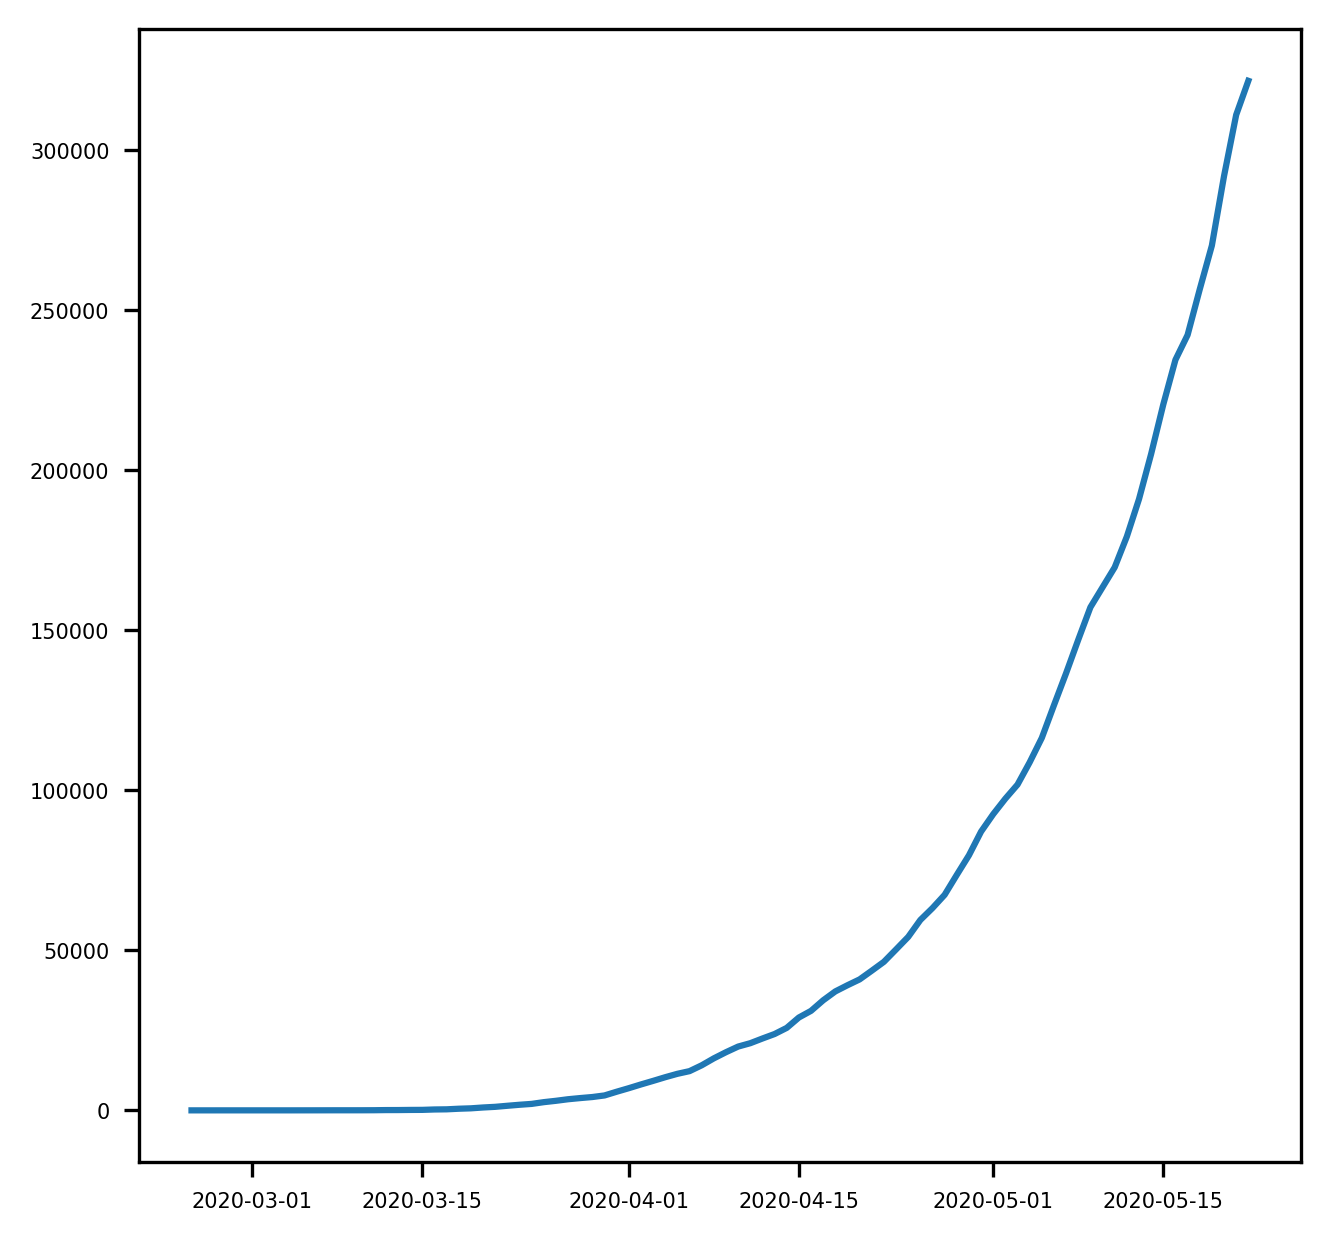

In [20]:
plt.figure(figsize=(5,5))
plt.plot(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

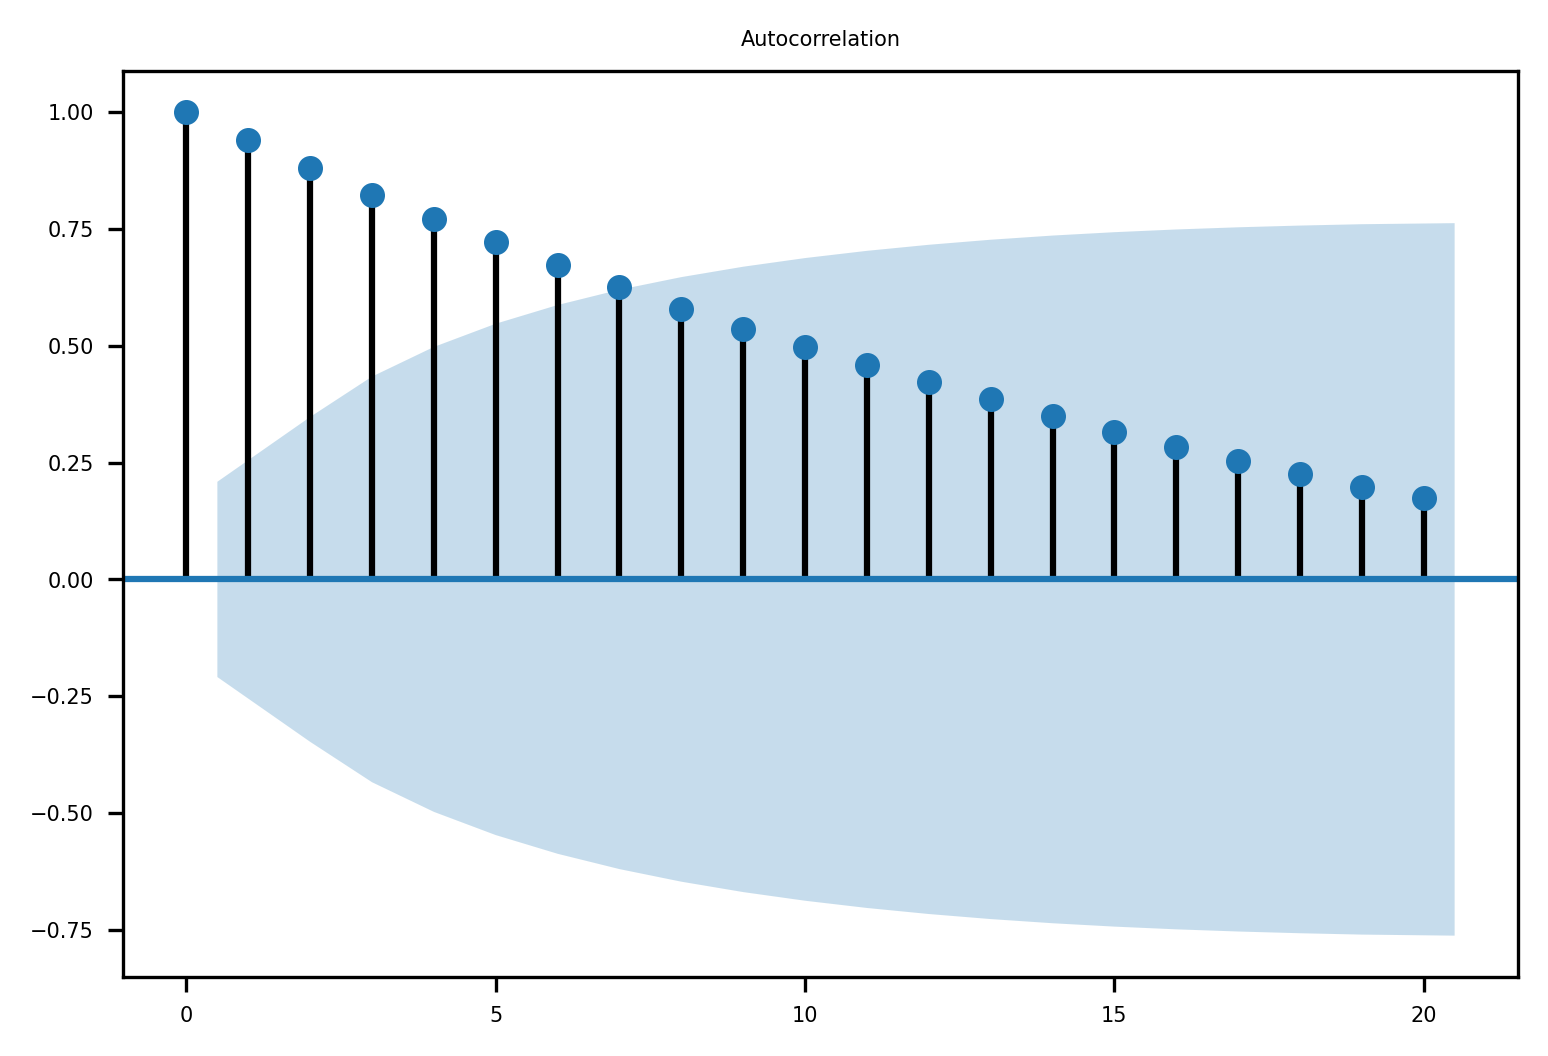

In [21]:
plt.figure(figsize=(5,2))
plot_acf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

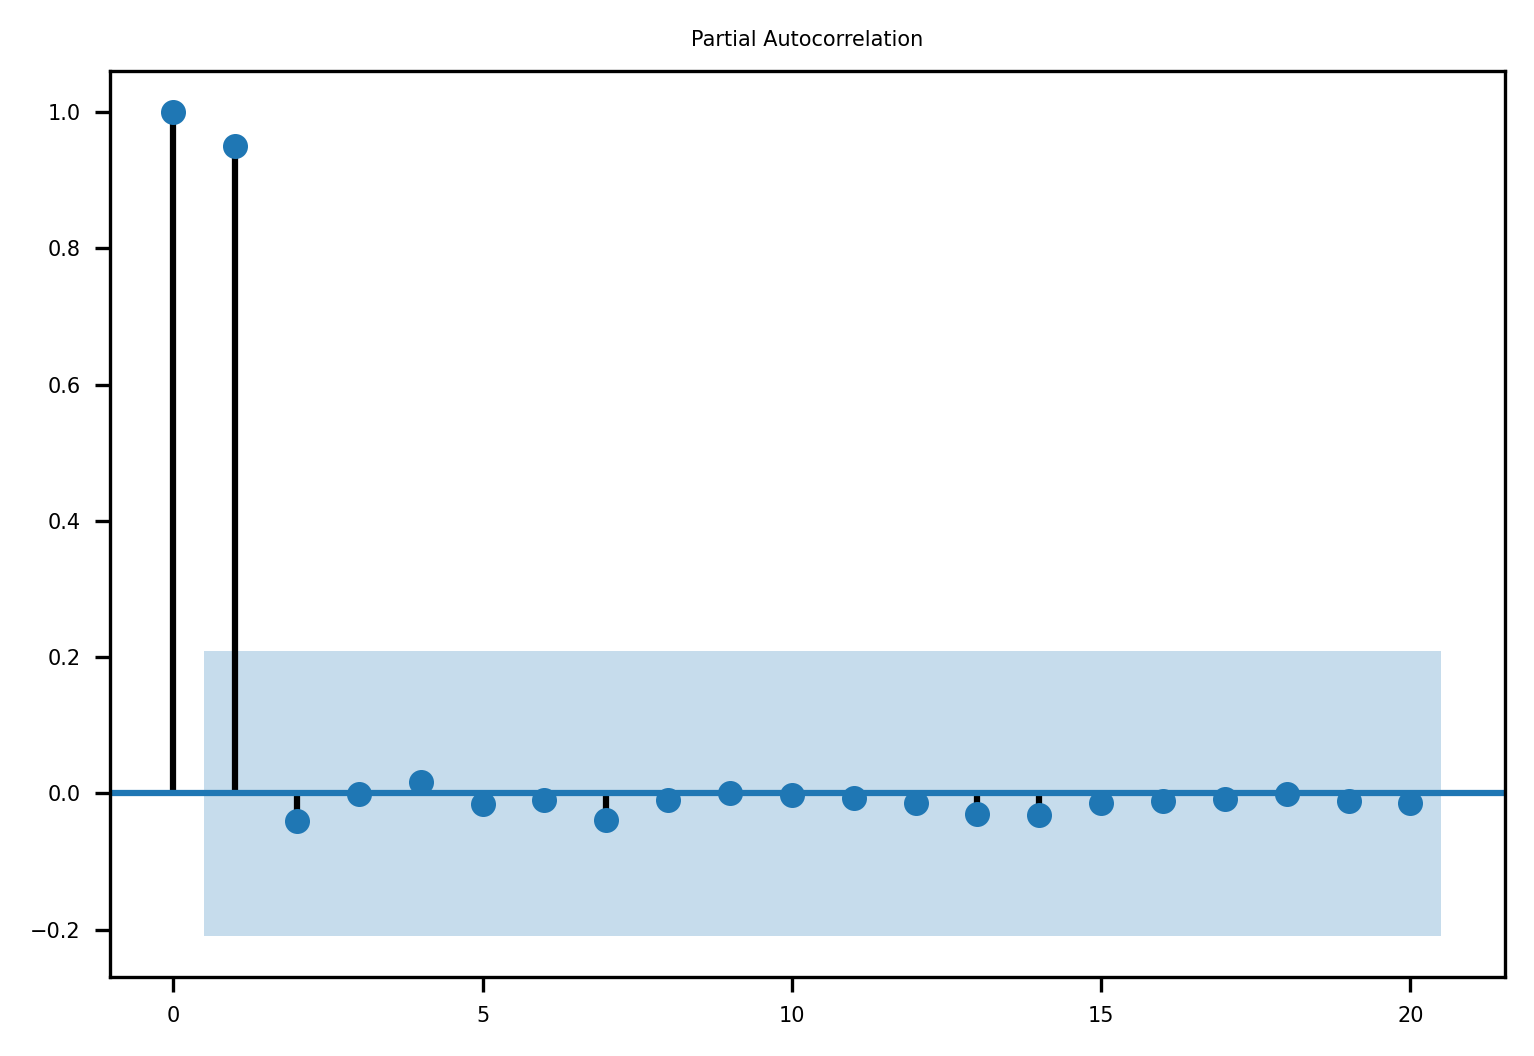

In [22]:
plt.figure(figsize=(5,2))
plot_pacf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

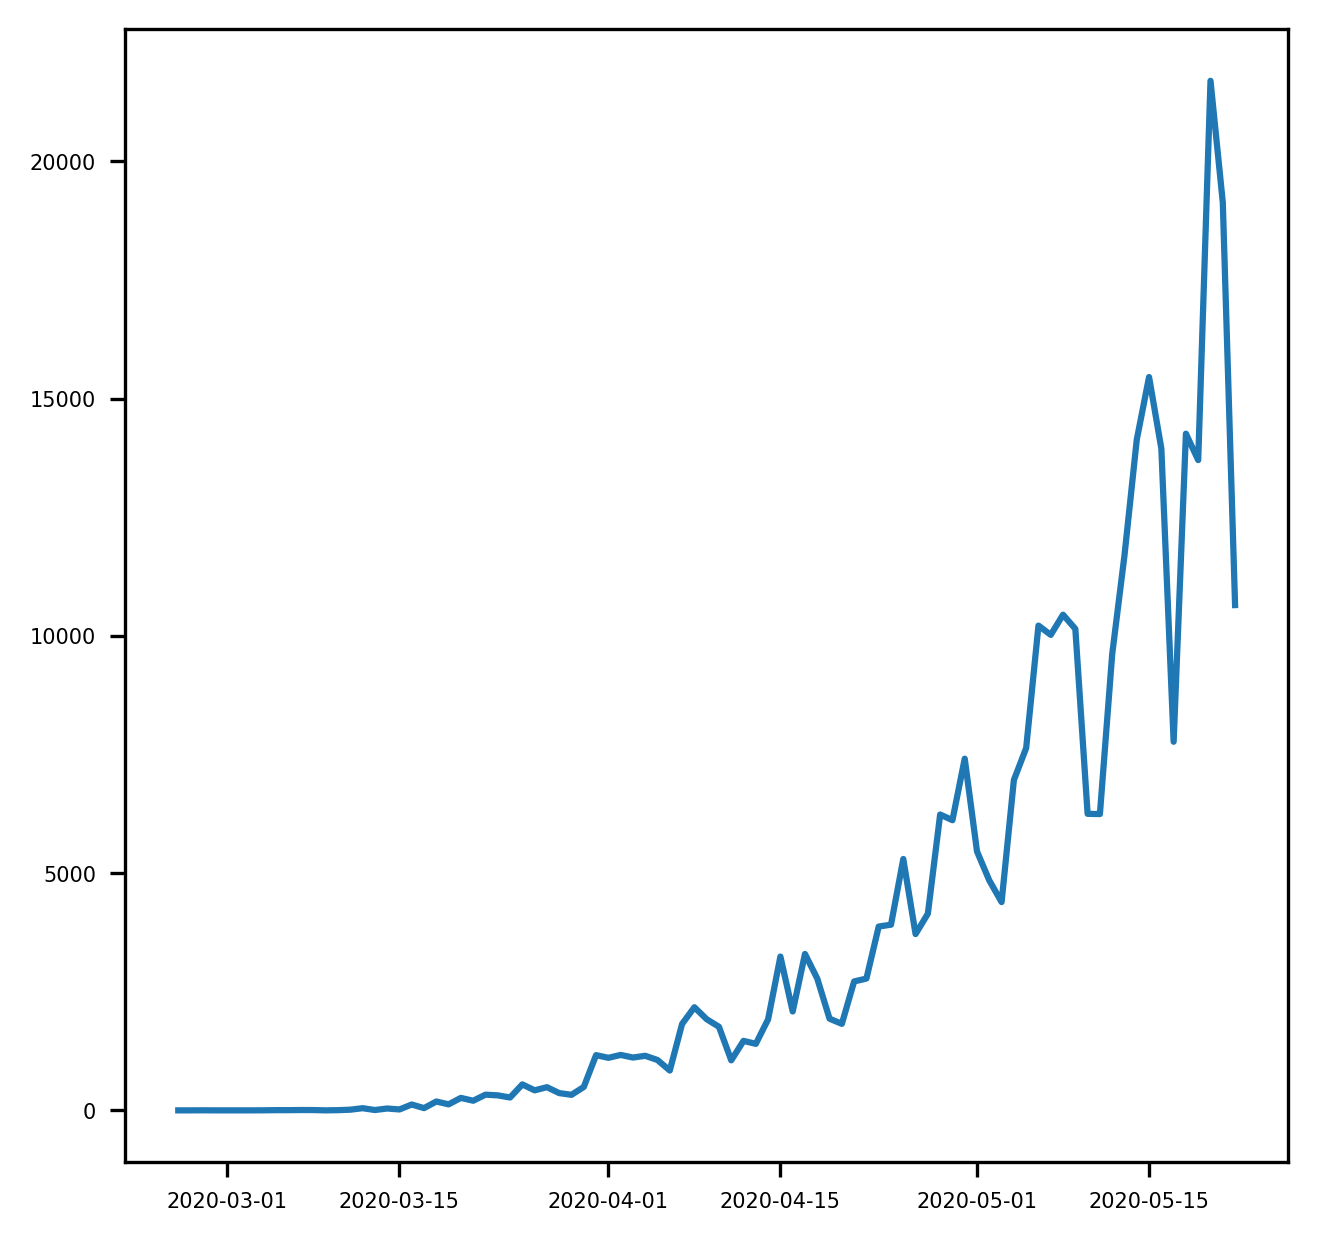

In [23]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

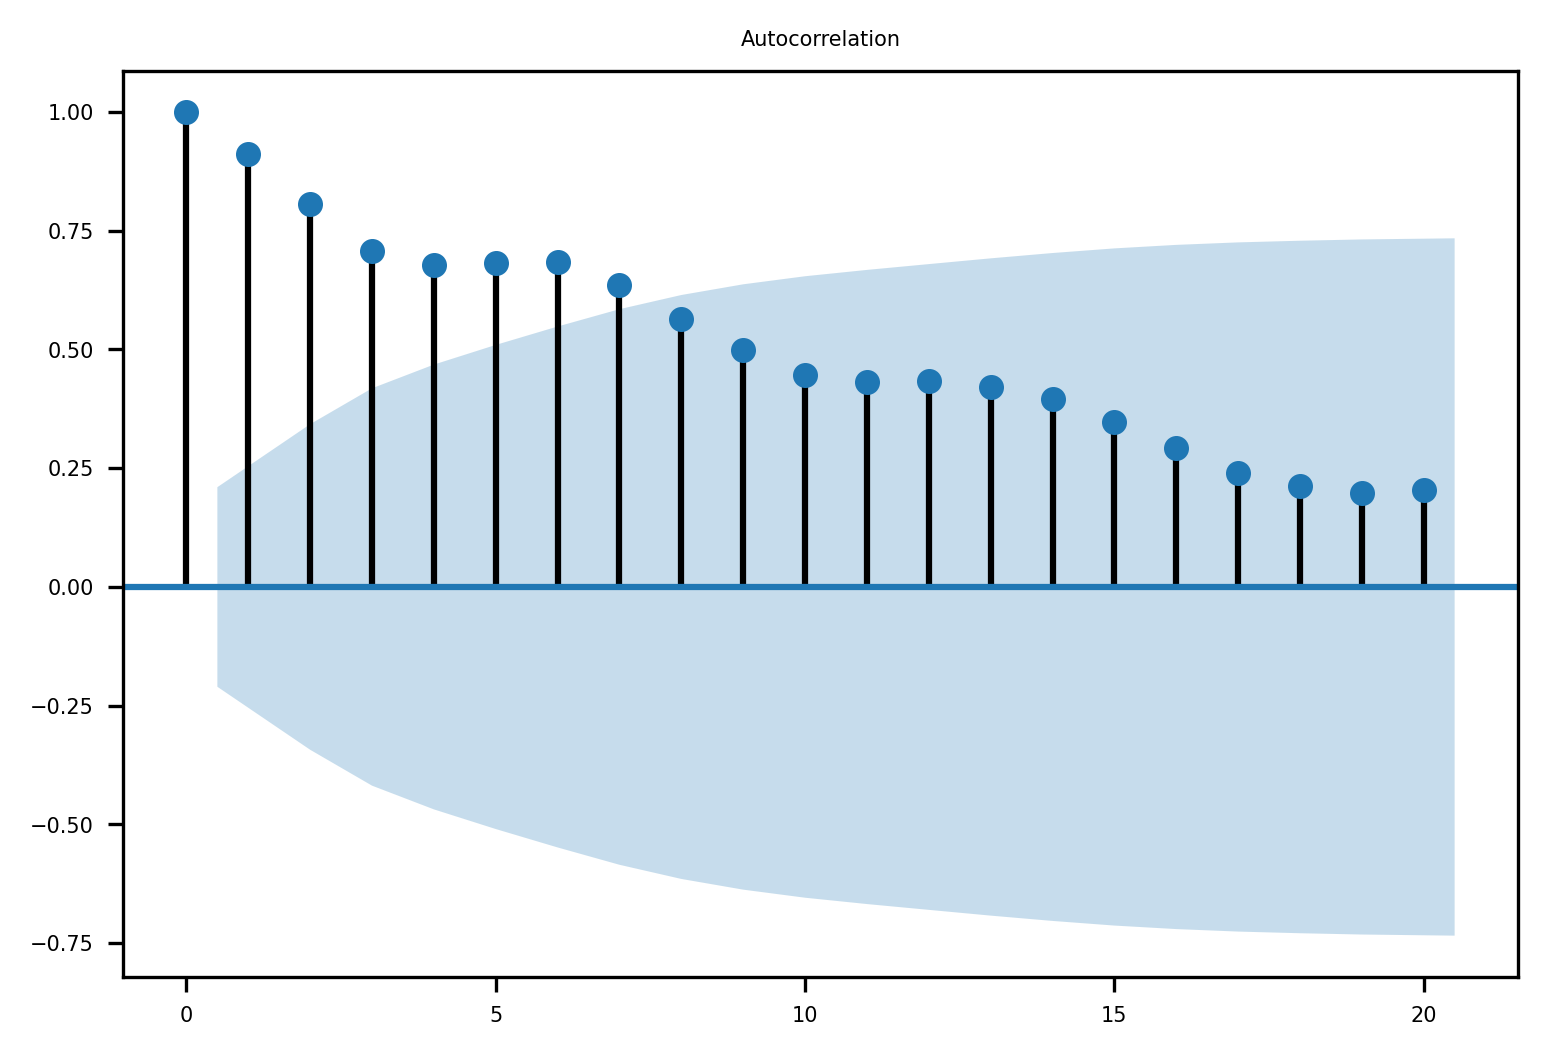

In [24]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

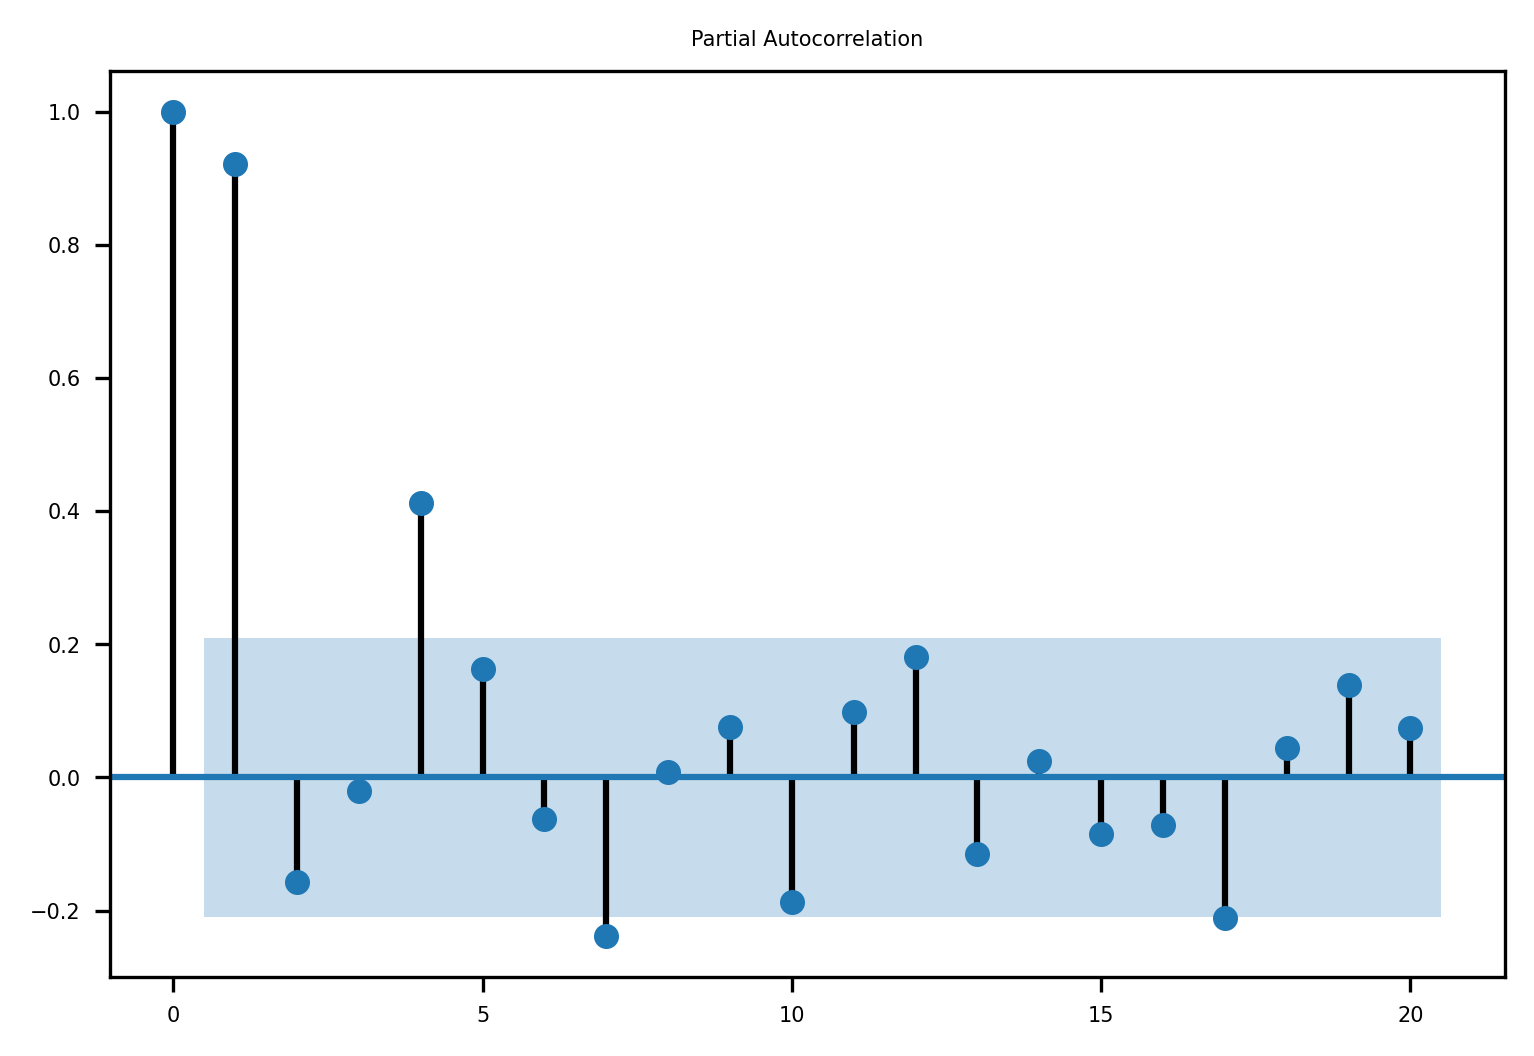

In [25]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

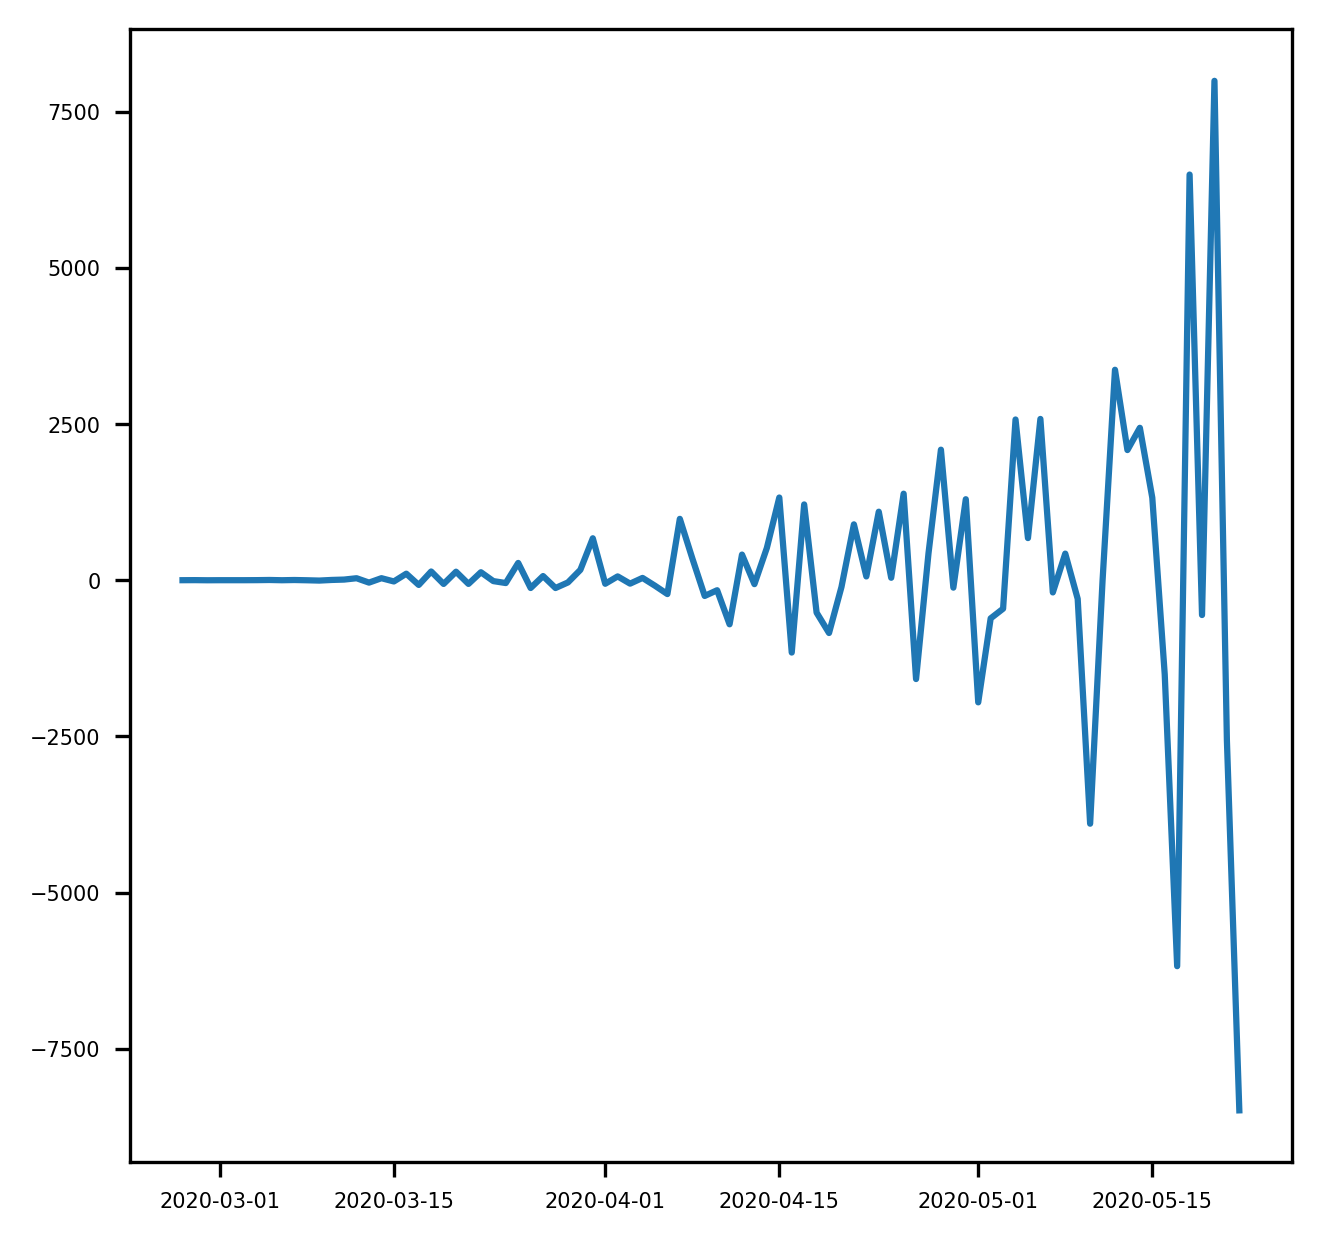

In [26]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

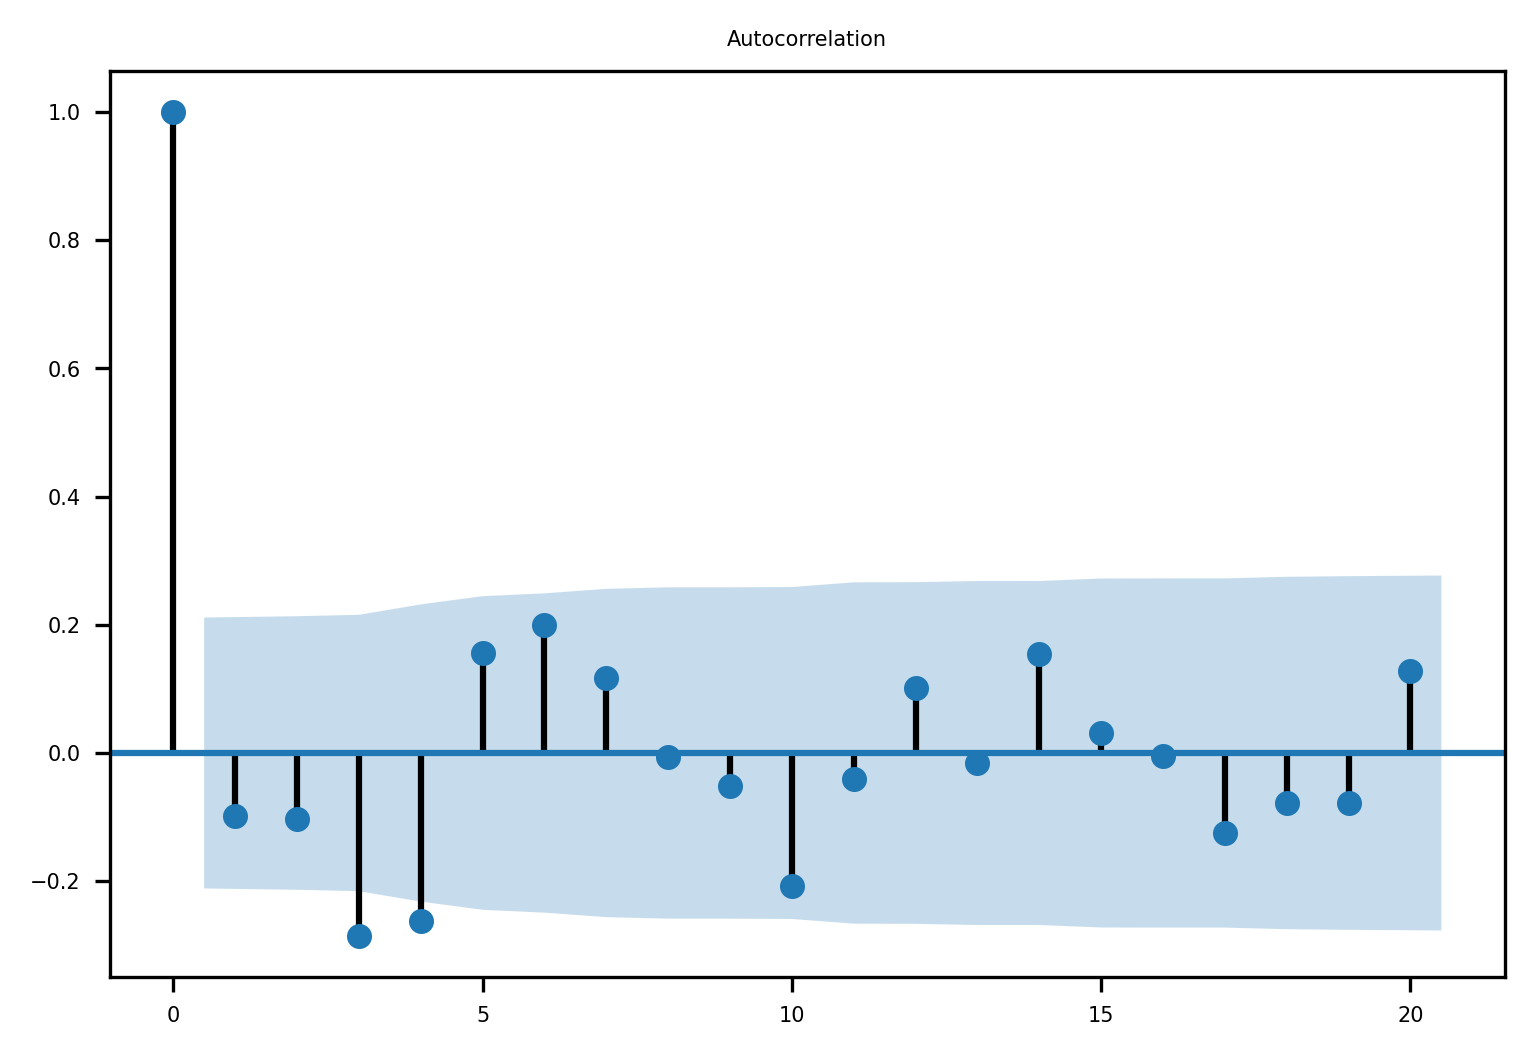

In [27]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

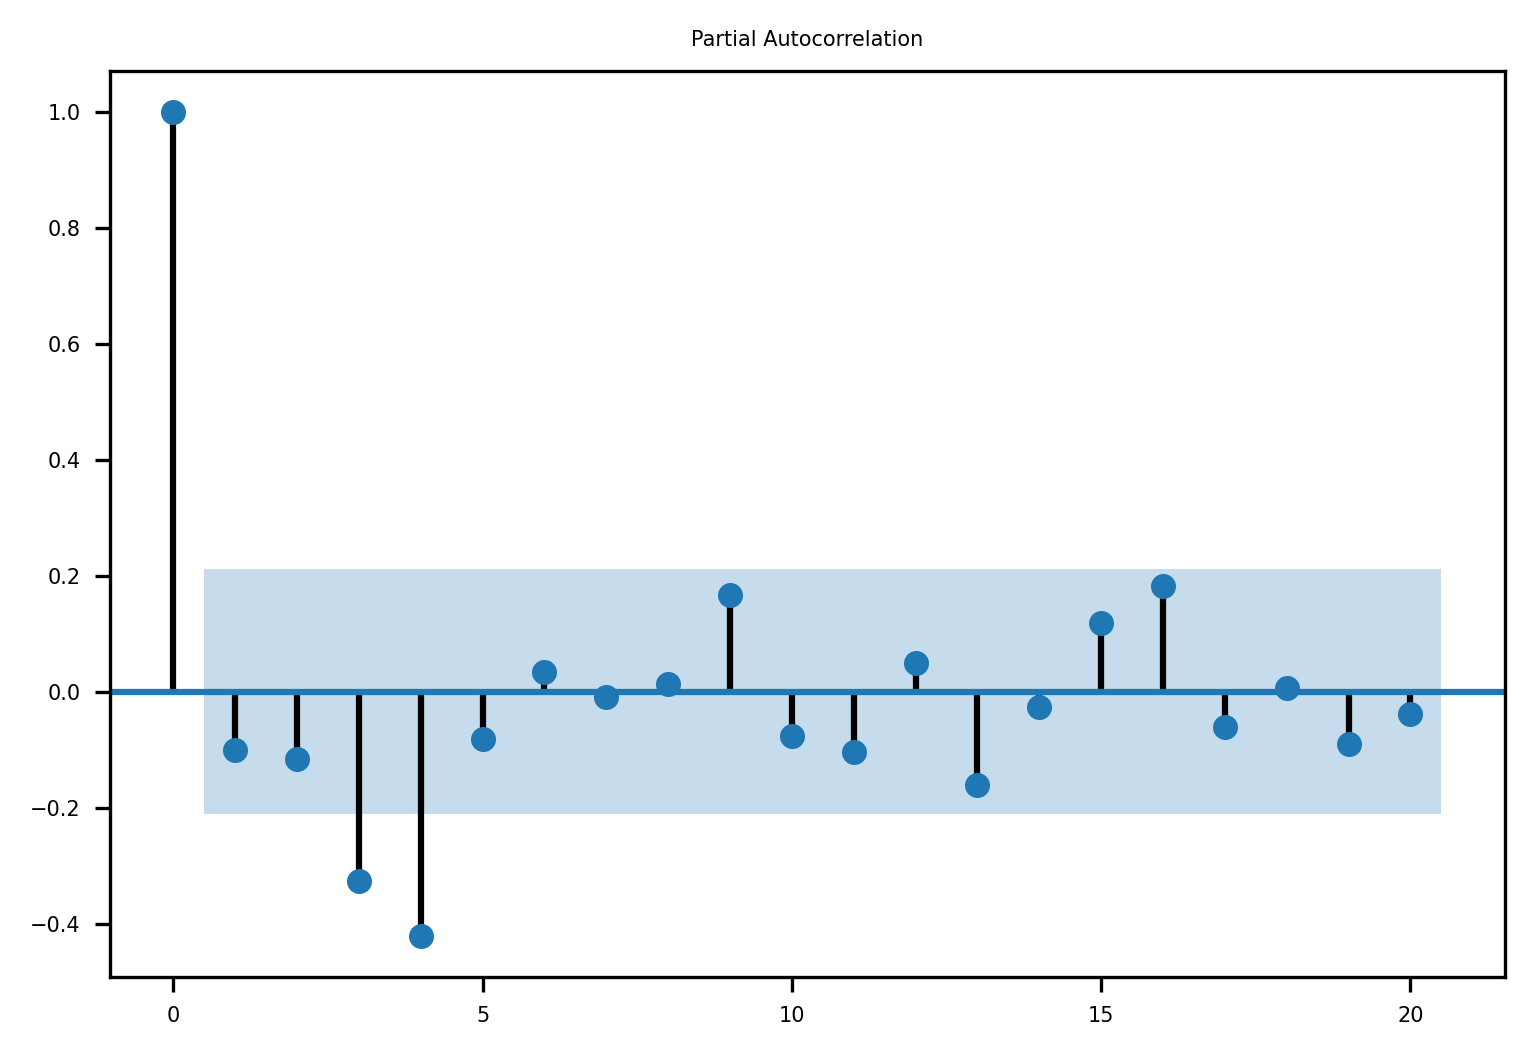

In [28]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [94]:
fonte = 20
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

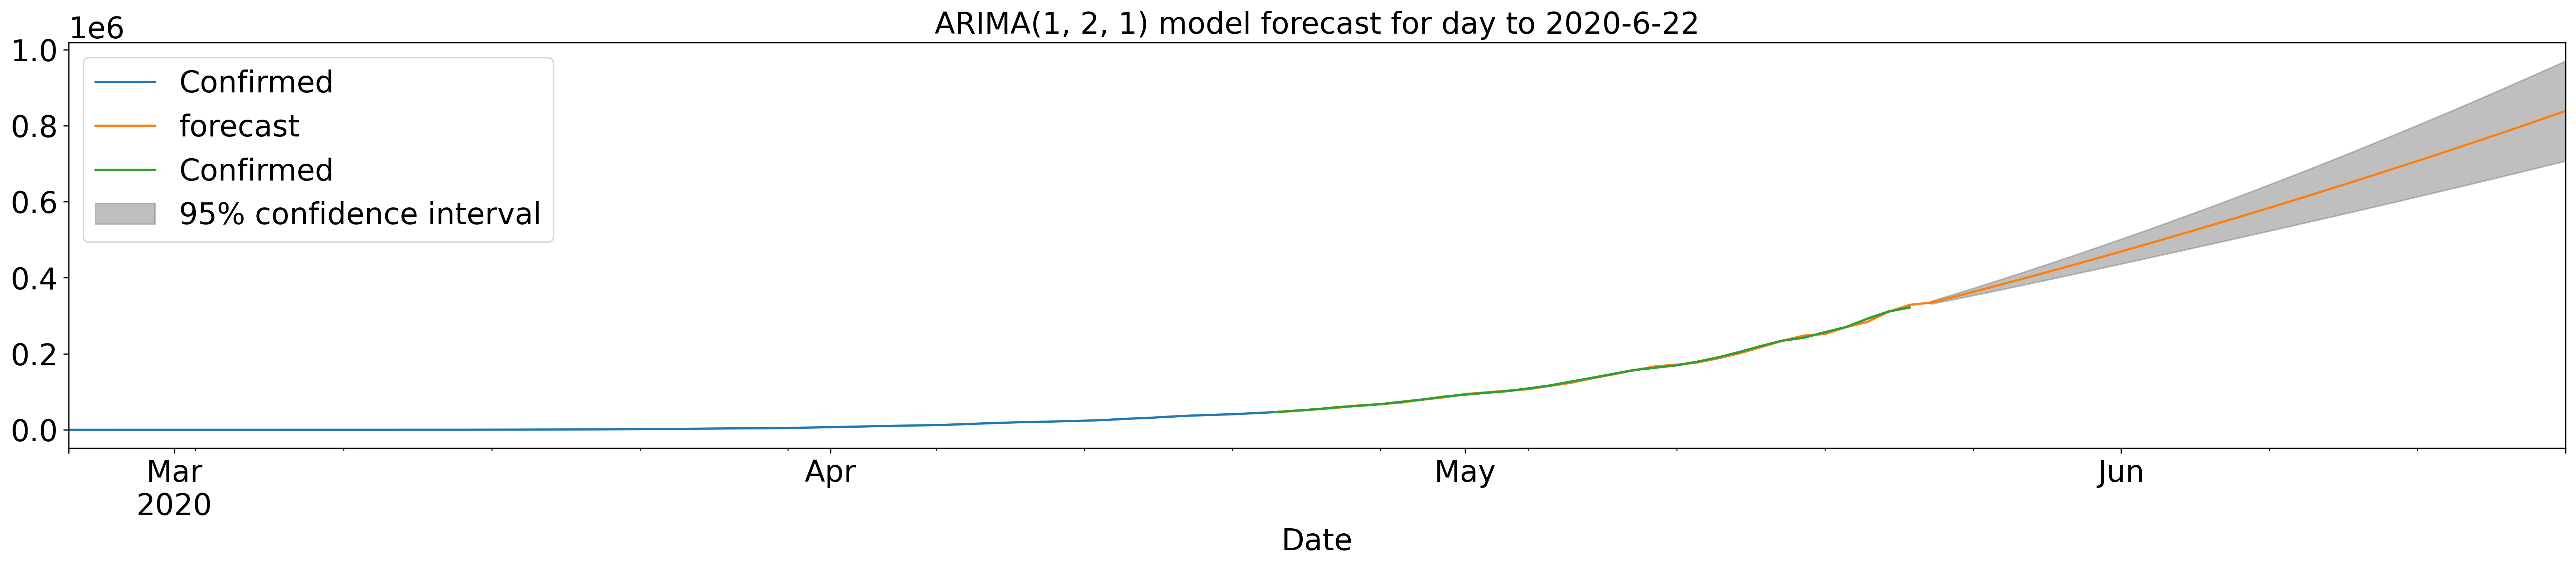

In [95]:
p = 1
d = 2
q = 1
test = (p,d,q) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -763.371
Method:                       css-mle   S.D. of innovations           1728.350
Date:                Mon, 25 May 2020   AIC                           1534.742
Time:                        19:58:15   BIC                           1544.559
Sample:                    02-27-2020   HQIC                          1538.693
                         - 05-22-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                170.0235     63.423      2.681      0.007      45.717     294.330
ar.L1.D2.Confirmed     0.4097      0.145      2.822      0.005       0.125       0.694
ma.L1.D2.Confirmed    -0.8081      0.073    -11.095      0.000      -0.951      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4408           +0.0000j            2.4408            0.0000
MA.1            1.2375           +0.0000j            1.2375            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [103]:
pred = results.forecast(steps=30)
pred_mean = list(pred[0])
pred_min = list(pred[2][:,0])
pred_max = list(pred[2][:,1])
pred_data = pd.DataFrame()
pred_data['Predicted'] = pred_mean
pred_data['Max'] = pred_max
pred_data['Min'] = pred_min
pred_data.to_csv('pred_data.csv')
pred_data

,Predicted,Max,Min
0,334594.960591,337982.463556,331207.457626
1,348397.397217,354793.669845,342001.124589
2,362704.977535,372121.555930,353288.399140
3,377319.882176,389786.384469,364853.379883
4,392161.063331,407735.560124,376586.566538
5,407195.315217,425958.241332,388432.389102
6,422409.033221,444455.449051,400362.617391
7,437796.643451,463230.257527,412363.029375
8,453355.862246,482284.988271,424426.736222
9,469085.753980,501620.720296,436550.787665


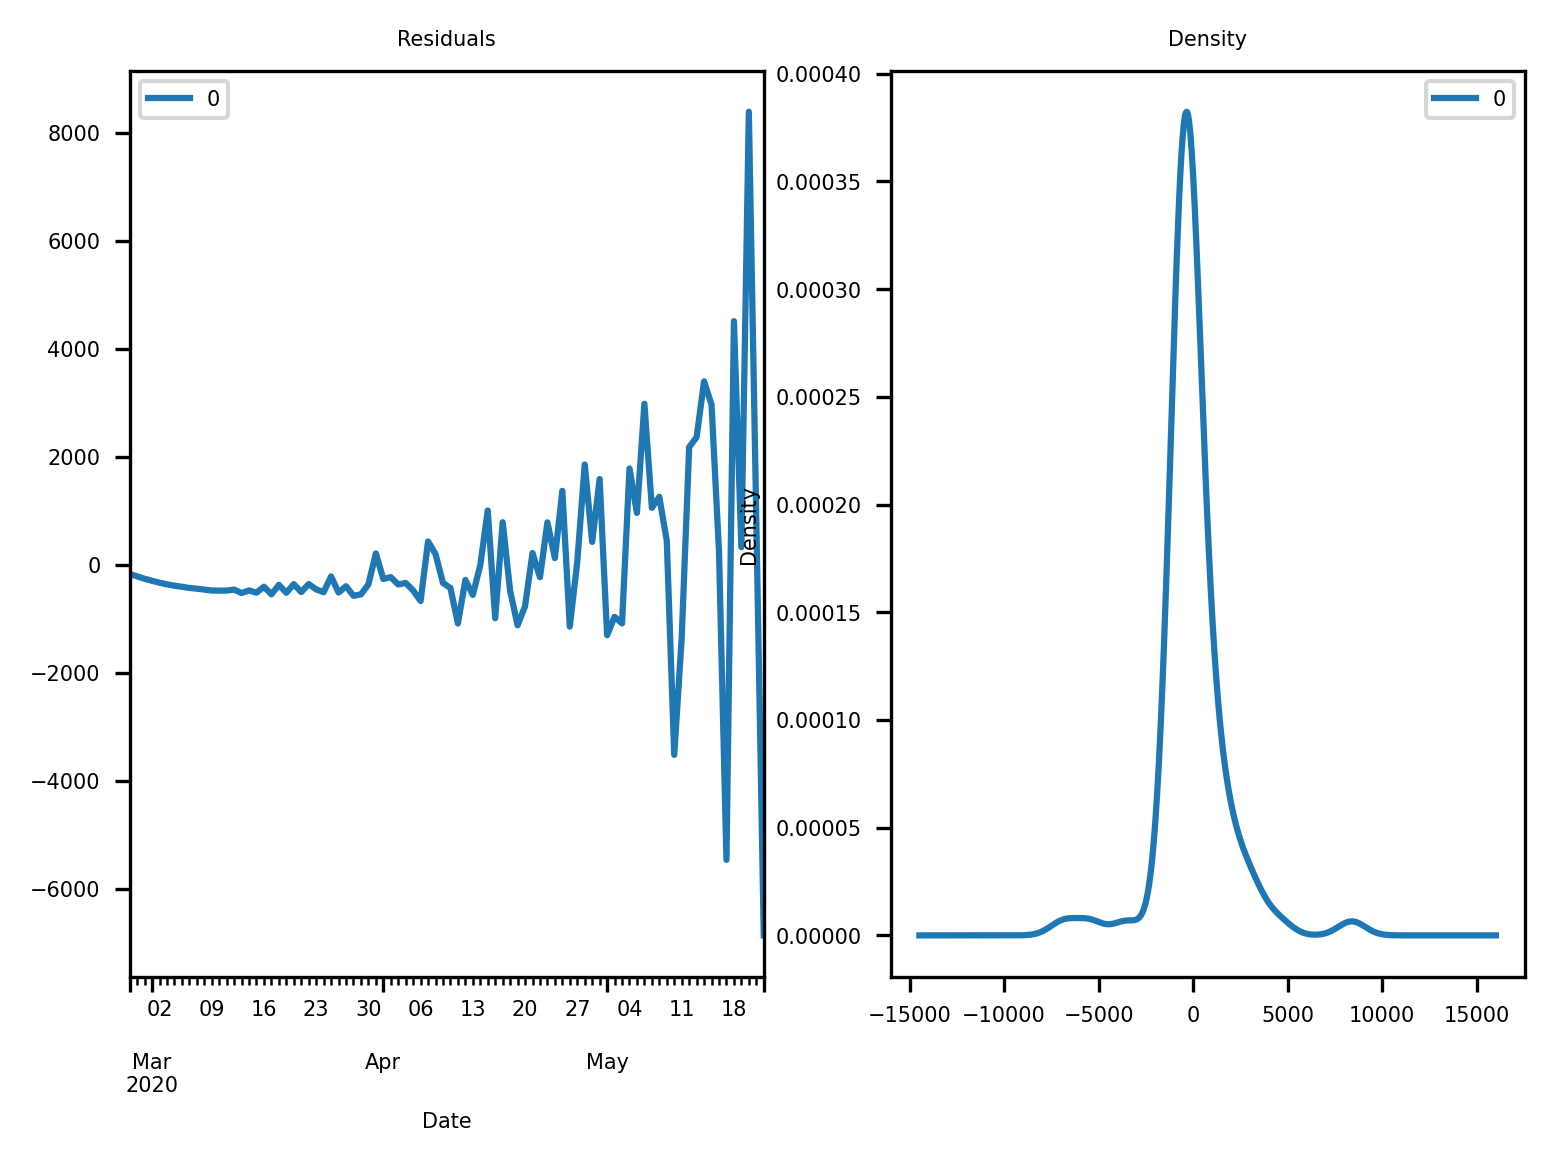

<Figure size 300x600 with 0 Axes>

In [27]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, )
plt.figure(figsize=(1,2))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

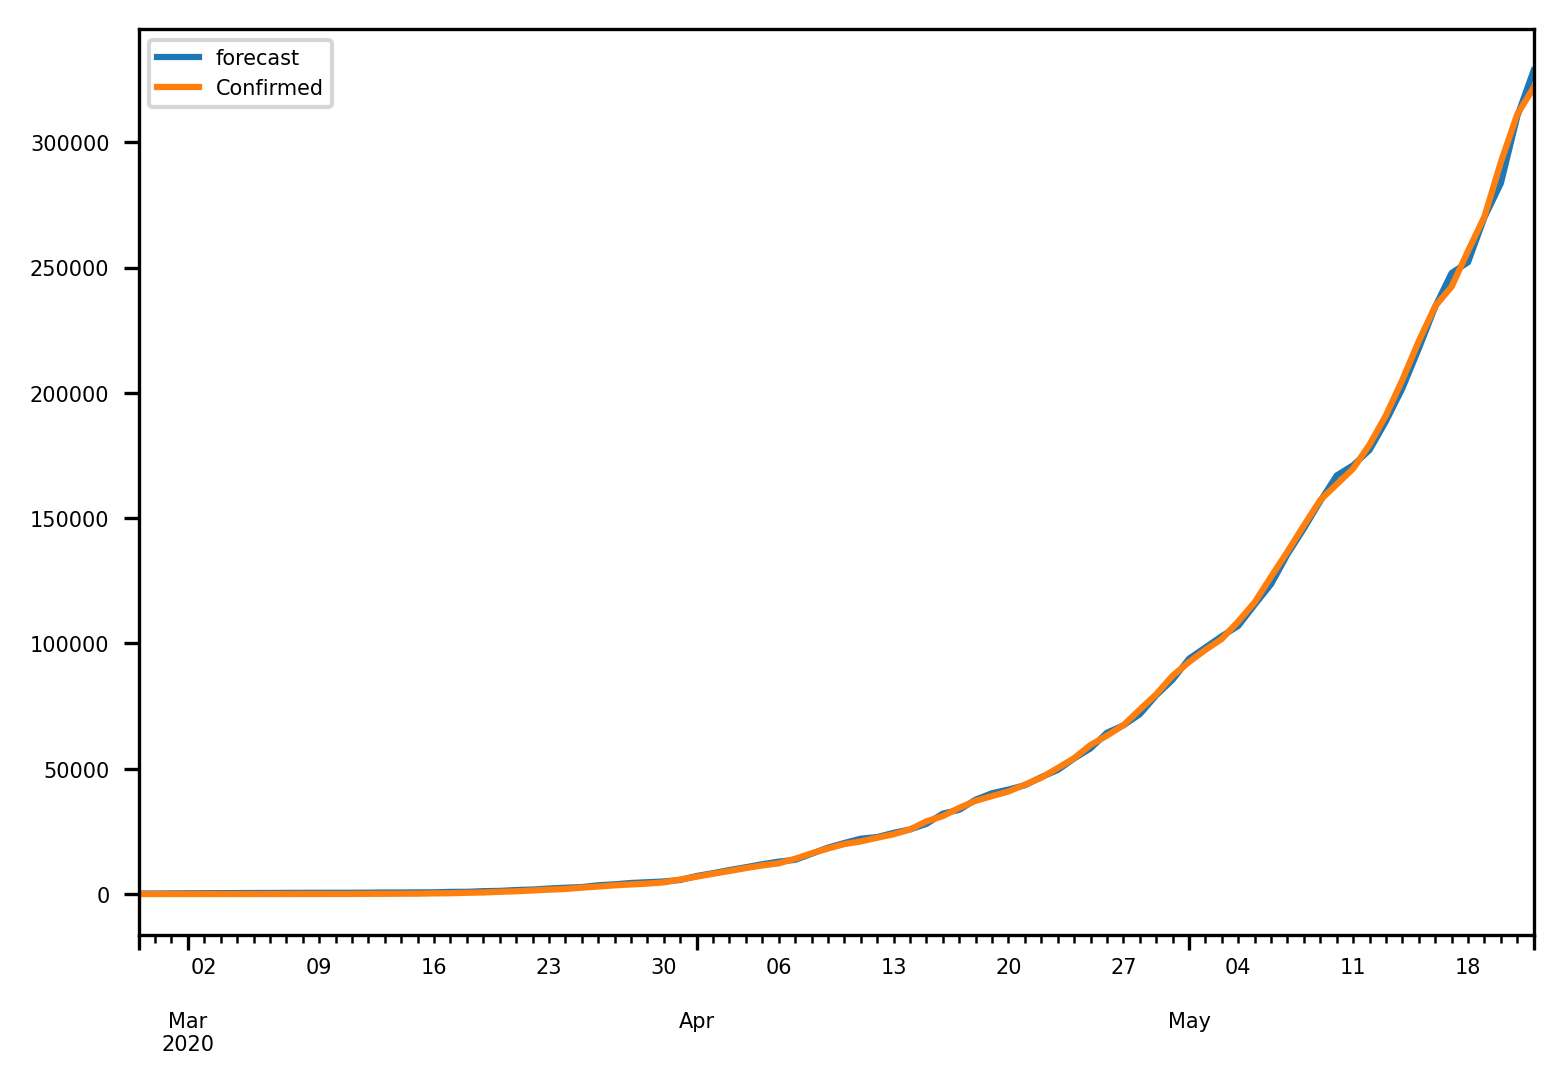

In [28]:
results.plot_predict(dynamic=False)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [29]:
fc, se, conf = results.forecast(79, alpha=0.05)
fc

array([ 334594.96059103,  348397.39721729,  362704.9775354 ,
        377319.88217586,  392161.06333088,  407195.31521701,
        422409.03322132,  437796.64345053,  453355.8622464 ,
        469085.75398018,  484985.93531901,  501056.24920909,
        517296.6313045 ,  533707.05524234,  550287.51022156,
        567037.99181689,  583958.49821529,  601049.02867394,
        618309.5828885 ,  635740.16073427,  653340.76216019,
        671111.3871453 ,  689052.03568105,  707162.70776391,
        725443.40339245,  743894.12256607,  762514.86528454,
        781305.63154775,  800266.42135567,  819397.23470828,
        838698.07160558,  858168.93204755,  877809.81603419,
        897620.72356552,  917601.65464152,  937752.60926221,
        958073.58742756,  978564.5891376 ,  999225.61439231,
       1020056.6631917 , 1041057.73553577, 1062228.83142452,
       1083569.95085794, 1105081.09383604, 1126762.26035881,
       1148613.45042627, 1170634.6640384 , 1192825.90119521,
       1215187.16189669,

In [30]:
from statsmodels.tsa.stattools import acf

In [31]:
model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1544.253, BIC=1549.161, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1545.144, BIC=1552.508, Time=0.013 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1540.465, BIC=1547.828, Time=0.069 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1542.641, BIC=1545.095, Time=0.006 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1534.636, BIC=1544.454, Time=0.153 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1531.926, BIC=1544.198, Time=0.126 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1545.134, BIC=1554.952, Time=0.021 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1518.447, BIC=1533.173, Time=0.236 seconds
Fit ARIMA: (3, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1531.940, BIC=1544.212, Time=0.044 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1511.690, BIC=1528.

In [32]:
smodel = pm.auto_arima(df, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=30,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 1, 1, 30) (constant=True); AIC=1036.243, BIC=1042.319, Time=0.362 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=True); AIC=1035.173, BIC=1039.224, Time=0.036 seconds
Fit ARIMA: (1, 2, 0)x(1, 1, 0, 30) (constant=True); AIC=1037.075, BIC=1045.177, Time=0.899 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 1, 30) (constant=True); AIC=1028.376, BIC=1036.478, Time=2.496 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=False); AIC=1033.342, BIC=1035.367, Time=0.060 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 0, 30) (constant=True); AIC=1028.071, BIC=1034.147, Time=0.421 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 0, 30) (constant=True); AIC=1028.029, BIC=1036.130, Time=3.053 seconds
Fit ARIMA: (0, 2, 1)x(2, 1, 0, 30) (constant=True); AIC=1029.960, BIC=1040.087, Time=8.774 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 1, 30) (constant=True); AIC=1029.960, BIC=1040.087, Time=3.884 seconds
Fit ARIMA: (0, 2, 1)x(2, 1, 1, 30) (constant=True); AIC=1031.960,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   88
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 30)   Log Likelihood                -507.277
Date:                              Mon, 25 May 2020   AIC                           1024.553
Time:                                      09:27:05   BIC                           1034.680
Sample:                                           0   HQIC                          1028.480
                                               - 88                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    192.5830     48.430      3.977      0.000      97.663     287.503
ma.L1         -0.5246      0.177     -2.964      0.003      -0.872      -0.178
ma.L2         -0.3577      0.147     -2.437      0.015      -0.645      -0.070
ma.S.L30      -0.5058      1.022     -0.495      0.621      -2.510       1.498
sigma2       4.12e+06   1.38e+06      2.989      0.003    1.42e+06    6.82e+06
===================================================================================
Ljung-Box (Q):                       30.10   Jarque-Bera (JB):               117.96
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              24.08   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+14. Standard errors may be unstable.
"""

In [33]:
sxmodel = pm.auto_arima(df, 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 1, 1, 30) (constant=True); AIC=1036.243, BIC=1042.319, Time=0.439 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=True); AIC=1035.173, BIC=1039.224, Time=0.042 seconds
Fit ARIMA: (1, 2, 0)x(1, 1, 0, 30) (constant=True); AIC=1037.075, BIC=1045.177, Time=0.889 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 1, 30) (constant=True); AIC=1028.376, BIC=1036.478, Time=3.090 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=False); AIC=1033.342, BIC=1035.367, Time=0.082 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 0, 30) (constant=True); AIC=1028.071, BIC=1034.147, Time=0.554 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 0, 30) (constant=True); AIC=1028.029, BIC=1036.130, Time=4.194 seconds
Fit ARIMA: (0, 2, 1)x(2, 1, 0, 30) (constant=True); AIC=1029.960, BIC=1040.087, Time=11.971 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 1, 30) (constant=True); AIC=1029.960, BIC=1040.087, Time=4.364 seconds
Fit ARIMA: (0, 2, 1)x(2, 1, 1, 30) (constant=True); AIC=1031.960

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   88
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 30)   Log Likelihood                -507.277
Date:                              Mon, 25 May 2020   AIC                           1024.553
Time:                                      09:29:43   BIC                           1034.680
Sample:                                           0   HQIC                          1028.480
                                               - 88                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    192.5830     48.430      3.977      0.000      97.663     287.503
ma.L1         -0.5246      0.177     -2.964      0.003      -0.872      -0.178
ma.L2         -0.3577      0.147     -2.437      0.015      -0.645      -0.070
ma.S.L30      -0.5058      1.022     -0.495      0.621      -2.510       1.498
sigma2       4.12e+06   1.38e+06      2.989      0.003    1.42e+06    6.82e+06
===================================================================================
Ljung-Box (Q):                       30.10   Jarque-Bera (JB):               117.96
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              24.08   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+14. Standard errors may be unstable.
"""

In [34]:
y = df[campo]
param_list_best=(1,2,1)
param_s_list_best=(0,1,0,30)
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Confirmed   No. Observations:                   88
Model:             SARIMAX(1, 2, 1)x(0, 1, [], 30)   Log Likelihood                -495.792
Date:                             Mon, 25 May 2020   AIC                            997.584
Time:                                     09:29:44   BIC                           1003.551
Sample:                                 02-25-2020   HQIC                           999.886
                                      - 05-22-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6001      0.132      4.561      0.000       0.342       0.858
ma.L1         -1.1247      0.055    -20.290      0.000      -1.233      -1.016
sigma2      5.453e+06   1.81e-08   3.01e+14      0.000    5.45e+06    5.45e+06
===================================================================================
Ljung-Box (Q):                       30.20   Jarque-Bera (JB):                69.80
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              49.48   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+29. Standard errors may be unstable.
"""

In [35]:
fonte = 15
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

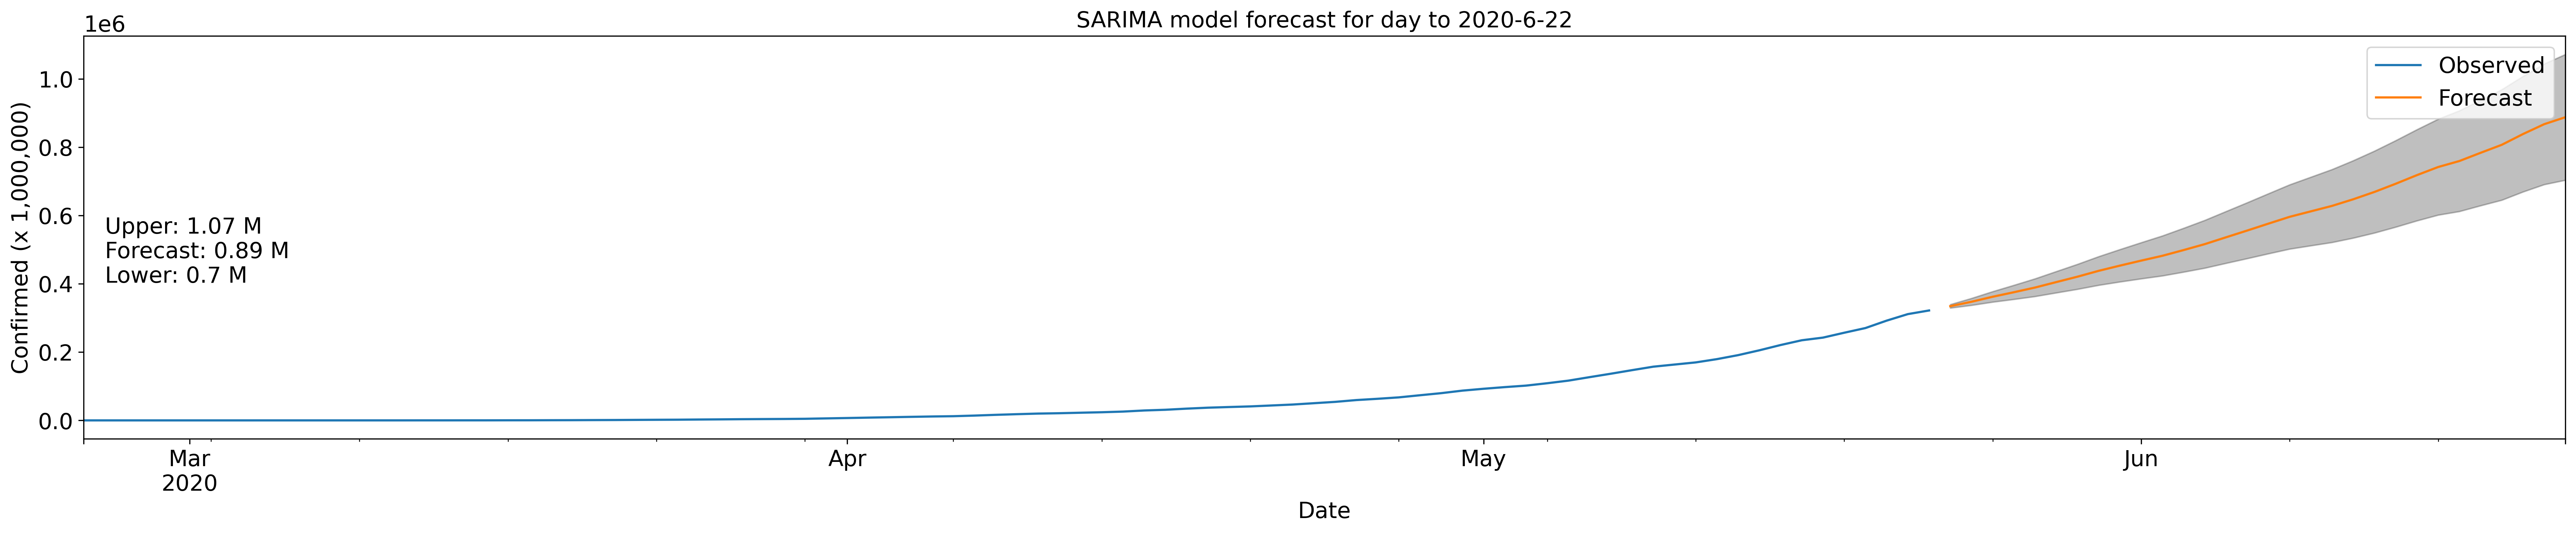

In [36]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-300000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')